In [3]:
import os
import pickle
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1. Load the results ------------------------------------------------
# ------------------------------------------------------------------
results_dir  = "particle count"
pickle_file  = "/nfs/home/colinn/Report_AC/delta_results.pkl"

with open(pickle_file, "rb") as f:
    delta_results = pickle.load(f)

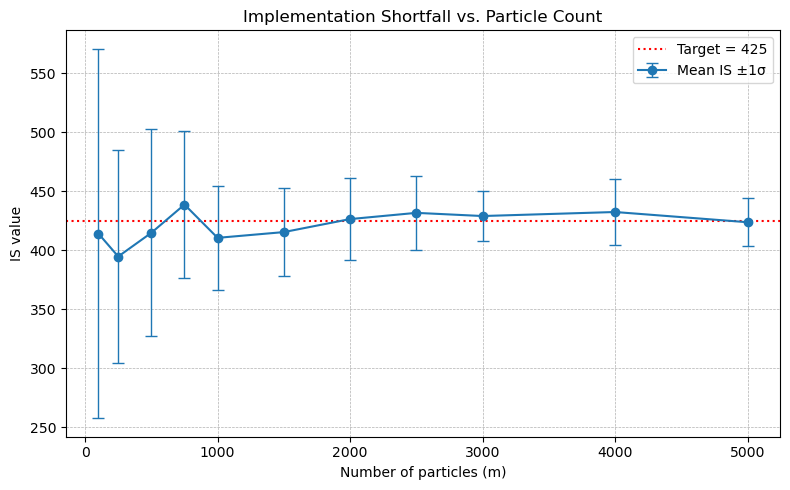

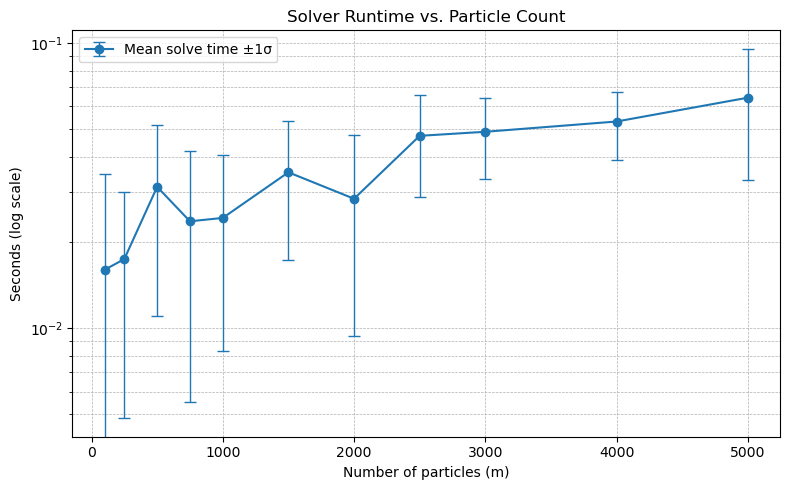

In [ ]:
# ------------------------------------------------------------------
# 2. Arrange the data ------------------------------------------------
# ------------------------------------------------------------------
# Sort the keys so the x‑axis is monotone
m_values   = sorted(delta_results.keys())

mean_IS    = [delta_results[m]["mean_obj"]  for m in m_values]
std_IS     = [delta_results[m]["std_obj"]   for m in m_values]

mean_time  = [delta_results[m]["mean_time"] for m in m_values]
std_time   = [delta_results[m]["std_time"]  for m in m_values]

# ------------------------------------------------------------------
# 3a. Plot mean IS with std IS as error bars -----------------------
# ------------------------------------------------------------------
plt.figure(figsize=(8, 5))
plt.errorbar(
    m_values, mean_IS, yerr=std_IS,
    fmt="o-", capsize=4, elinewidth=1, label="Mean IS ±1σ"
)
plt.title("Implementation Shortfall vs. Particle Count")
plt.xlabel("Number of particles (m)")
plt.ylabel("IS value")
plt.axhline(y=425,
            color="red",          # red line
            linestyle=":",        # dotted style
            linewidth=1.5,
            label=f"Target = {425}")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()

# ------------------------------------------------------------------
# 3b. Plot mean solve‑time with std solve‑time as error bars -------
#     (logarithmic y‑axis)                                          -
# ------------------------------------------------------------------
plt.figure(figsize=(8, 5))
plt.errorbar(
    m_values, mean_time, yerr=std_time,
    fmt="o-", capsize=4, elinewidth=1, label="Mean solve time ±1σ"
)
plt.title("Solver Runtime vs. Particle Count")
plt.xlabel("Number of particles (m)")
plt.ylabel("Seconds (log scale)")
plt.yscale("log")       # <-- log‑scale here
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()

plt.show()

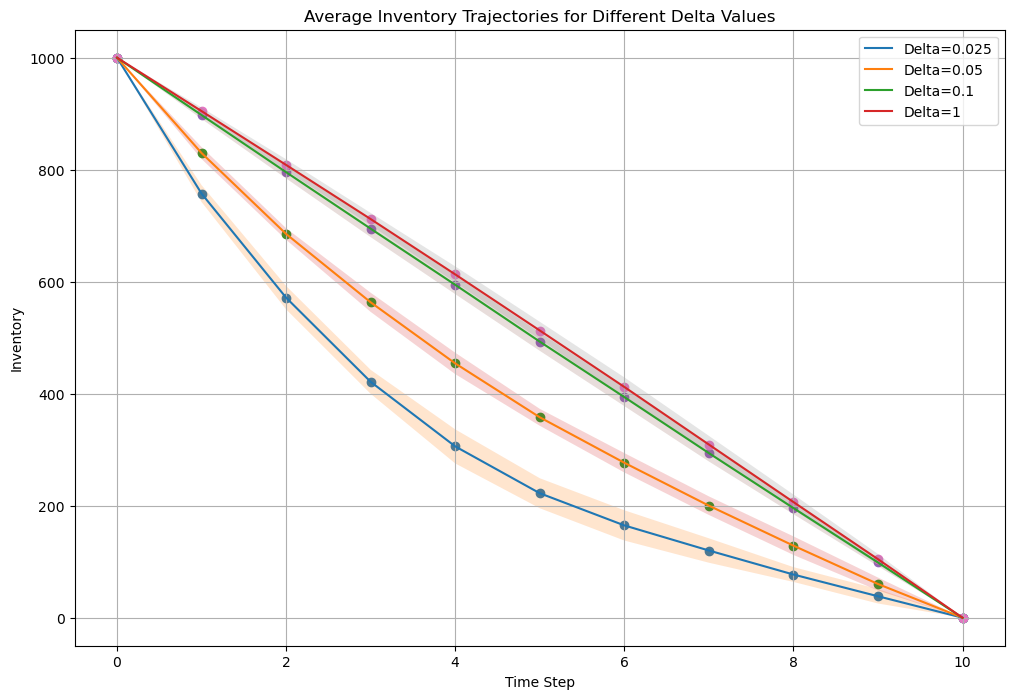

In [ ]:
for delta in delta_list:
    plt.figure(figsize=(10, 6))
    plt.title(f'Individual Inventory Trajectories (Delta = {delta})')
    plt.xlabel('Time Step')
    plt.ylabel('Inventory')
    plt.grid(True)

    # Plot each run's trajectory
    for inventory_list in delta_results[delta]["inventory_runs"]:  # We'll define this key below
        plt.plot(range(len(inventory_list)), inventory_list, alpha=0.5)

    #plt.savefig(f"individual_plots/inventory_trajectories_delta_{delta}.png", bbox_inches='tight')
   # plt.close()


# -------------------------
# Plotting all average trajectories with ±1 standard deviation bands on one plot
# -------------------------
plt.figure(figsize=(12, 8))
time_steps = range(N+1)

for delta in delta_list:
    mean_traj, std_traj = delta_results[delta]["mean_inventory"], delta_results[delta]["std_inventory"]
    upper_bound = mean_traj + std_traj
    lower_bound = mean_traj - std_traj
    plt.scatter(time_steps, mean_traj)
    plt.plot(time_steps, mean_traj, label=f'Delta={delta}')
    plt.fill_between(time_steps, lower_bound, upper_bound, alpha=0.2)

import pickle

with open("delta_results.pkl", "wb") as f:
    pickle.dump(delta_results, f)

plt.title('Average Inventory Trajectories for Different Delta Values')
plt.xlabel('Time Step')
plt.ylabel('Inventory')
plt.legend()
plt.grid(True)
plt.savefig('individual_plots/Delta_plots.png', bbox_inches = 'tight')